## Unlocking Reinforcement Learning's Success in Advancing AI Strategies for Tic-Tac-Toe

###  Abstract

This study investigates the efficacy of reinforcement learning (RL) algorithms applied to the Tic-Tac-Toe game, with the objective of constructing an artificial intelligence (AI) capable of acquiring optimal gameplay strategies through iterative learning. We extend the conventional $3$ x $3$ board to other settings, such as $4$x$4$, $5$x$5$,..., $n$x$n$ and also playing on $k$ multiple boards simultaneously. The expanded game framework employed introduces additional challenges compared to the conventional single-board configuration, necessitating the AI to devise strategies spanning multiple boards while accounting for their interconnections.  Despite the inherent simplicity of the traditional Tic-Tac-Toe game, it serves as a structured domain for evaluating fundamental RL principles, encompassing state management, reward frameworks, and policy formulation. In this endeavor, various prominent RL algorithms are implemented and scrutinised, including Q-Learning, Neural Fitted Q-Iteration Algorithm (NFQ) and AlphaGo Zero. Furthermore, attention is directed towards methodologies such as Deep Q-Network (DQN) and Monte Carlo Tree Search (MCTS) for comprehensive exploration and analysis. Our research illuminates the strengths and limitations of a range of RL algorithms in the context of Tic-Tac-Toe, providing invaluable insights for advancing studies in strategic decision-making amidst uncertainty.

In short we were able to demonstrate convergence and learning of the agents for a variety of algorithms including Q-Learning, Double Q-Learning, Neural Fitted Q-Iteration, Deep Q-Network, Monte Carlo Tree search (with exploring starts) and AlphaGo Zero (with some variants and exploring starts). Our best model was that of Monte Carlo Tree Search: it learns very fast compared to the others and outperforms all of the other algorithms in just a short amount of training time. Finally, we found out that DQN beats Q-Learning in most of the cases and MCTS beats DQN. Regarding AlphaGo Zero it is proposed for future work to train for longer time so that it performs better in larger game setups.

### 1. Introduction

Reinforcement learning stands as a potent paradigm for training AI agents within environments characterized by the absence of explicit instructions. Unlike supervised learning methodologies, wherein AI agents are provided with labeled examples, RL frameworks necessitate agents to acquire knowledge through a process of trial and error. Herein, agents engage dynamically with the environment, executing actions and receiving rewards contingent upon the attainment of desired outcomes. This approach underscores the iterative nature of learning, wherein agents refine their strategies iteratively through exploration and exploitation. 

This project falls under the notion of _Multi-Agent Reinforcement Learning_ (MARL), where multiple players are learning strategies simultaneously, presenting a great deal of non-stationarity in the learning process. We refer the reader to <font color='blue'>[1]</font> for a more comprehensive discussion of MARL. More specifically, the game Tic-Tac-Toe belong to the class of Two-Player Zero Sum Games. This are games where the interest of both players are directly opposed <font color='blue'>[21]</font>. They can also be modelled as an MDP with a slight extension: $(S, A, B, P, R, \gamma)$ where $A$ and $B$ represent the action space for each of the first and second players, respectively. Moreover, the rewards are given with respect to player 1 and are usually +1 if player 1 wins, 0 if the game ends in a draw or for any non-termial state and -1 if player 1 loses. In essence, player 1 aims to maximise the rewards, whereas player 2 aims to minimise it, hence, player 1 aims to solve the max-min strategy and player 2 the min-max strategy. The first one corresponds to the strategy that maximises the minimum expected reward for the responses of the opponent. This is reasonable because optimal play from the opponent is assumed <font color='blue'>[21]</font>.

The primary objective of this project is to leverage RL techniques to train AI agents to excel in playing Tic-Tac-Toe, encompassing both the traditional single-board version and a more intricate multi-board variant. Initially, the AI agents will undergo a foundational training phase where they will engage with a static model. This phase is crucial for laying the groundwork, focusing on the development of fundamental gameplay strategies and honing decision-making. By engaging with a static model, the agents can gradually learn and internalise basic tactics and principles of the game. Following the initial training phase, the project will introduce an adaptation stage, marking a pivotal transition for the AI agents. During this phase, the agents will confront opponents equipped with policies derived from random past trained models. This strategic move aims to expose the agents to a diverse range of gameplay styles, fostering adaptability and resilience in their decision-making processes. By confronting varying opponents, the agents will be challenged to adapt their strategies dynamically, ultimately enhancing their overall proficiency in playing Tic-Tac-Toe across different scenarios.

Throughout the project lifecycle, a rigorous evaluation framework will be established to assess the agents' progress and performance. Key performance metrics such as average reward, win rates, loss rates, draw rates, and game lengths will be meticulously tracked and analyzed. These metrics serve as valuable indicators of the agents' mastery of the game and their ability to effectively navigate different gameplay situations. Based on the insights leaned from performance evaluations, iterative fine-tuning of the agents' strategies will be conducted. This process will involve experimentation with various hyperparameters and training techniques, aiming to optimise the agents' performance and further elevate their gameplay capabilities.

## 2. Literature Review

Reinforcement Learning offers a distinctive approach to training autonomous agents <font color='blue'>[10]</font>. Unlike conventional machine learning methods that rely on labeled datasets, RL enables agents to learn optimal long-term behaviors through interaction with their environment. One of the key strengths of RL is its applicability to a wide range of domains, from robotics and game playing to finance and healthcare <font color='blue'>[15]</font>. Tic-Tac-Toe, a seemingly simple yet strategically rich game, serves as an illustrative domain for exploring fundamental RL principles. Moreover, it offers a versatile toolkit of algorithms and techniques, ranging from classic methods like Q-Learning and to more advanced approaches such as Deep Q-Networks (DQN) and Policy Gradient methods <font color='blue'>[7]</font>. These algorithms provide researchers with the flexibility to tackle diverse problems and tailor solutions to specific application domains.

MARL expands the scope of traditional single-agent RL to environments where multiple agents interact simultaneously <font color='blue'>[16]</font>. In the realm of Tic-Tac-Toe, MARL becomes especially pertinent when considering matches between two AI-driven agents and it presents distinct challenges and opportunities when applied to Tic-Tac-Toe. Unlike single-agent RL, where an agent operates in isolation, MARL involves agents learning amidst the dynamic interplay of other agents within a shared environment. The dynamic nature of MARL environments introduces complexity, requiring agents to continuously adapt their strategies to counteract the evolving behaviors of others <font color='blue'>[17]</font>. In Tic-Tac-Toe, this dynamic interaction between agents adds strategic depth and uncertainty, as each player endeavors to predict and respond to their opponent's moves. MARL serves as a versatile framework for exploring both cooperative and competitive interactions among autonomous agents <font color='blue'>[18]</font>. In Tic-Tac-Toe, MARL algorithms can train agents to learn optimal strategies through iterative gameplay sessions. Over time, agents refine their tactics and develop nuanced approaches to offense and defense. Furthermore, MARL offers insights into emergent behaviors and strategies arising from interactions among multiple learning agents <font color='blue'>[19]</font>. 

Q-learning serves as a foundational algorithm in the realm of RL, celebrated for its efficacy in acquiring optimal strategies, notably demonstrated in games like Tic-Tac-Toe <font color='blue'>[3]</font>. However, despite its straightforward implementation, Q-learning encounters difficulties when confronted with larger state spaces. This limitation has prompted the emergence of novel variants such as DQL and DQN, designed to address the scalability challenges inherent in traditional Q-learning. Double Q-Learning, elucidated by Hasselt et al.<font color='blue'>[4]</font>, tackles the pervasive issue of overestimation observed in conventional Q-learning methods, thereby enhancing its learning efficiency. Through a nuanced approach that involves decoupling the action selection and value estimation processes, DQL provides more accurate assessments of action values, thereby fostering more robust learning outcomes.

In contrast, <font color='blue'>[7]</font> DQN represents a significant advancement by harnessing the capabilities of deep neural networks. By employing neural networks to approximate the Q-function, DQN transcends the limitations of traditional Q-learning, enabling it to effectively handle complex state representations. This breakthrough extends the applicability of RL techniques to domains characterized by significantly larger state spaces, encompassing complex games and real-world control problems. 

NFQ integrates foundational concepts from game theory, offering a sophisticated framework for agents to learn optimal policies in complex, interactive environments. Central to NFQ is the incorporation of Nash equilibrium, a cornerstone concept in game theory representing a state where no player can improve their utility by unilaterally changing their  <font color='blue'>[21]</font> strategy. By embracing this principle, NFQ equips agents with the ability to navigate intricate interactions and converge towards equilibrium strategies that maximize their individual rewards while considering the strategies of other agents.

Pioneering work by Lanctot et al. <font color='blue'>[20]</font> has provided compelling evidence of NFQ's effectiveness across various game scenarios, notably including the classic example of Tic-Tac-Toe.This highlights the importance of NFQ in tackling the complexities inherent in multi-agent environments, where conventional single-agent methods might encounter difficulties. Drawing upon principles from game theory, NFQ provides a sturdy framework for agents to adjust and excel in dynamic, competitive contexts, thus aiding in the progression of reinforcement learning methodologies for intricate real-world tasks.

MCTS offers an alternative methodology for decision-making, striking a balance between exploration and exploitation. <font color='blue'>[21]</font> Studies have been done to explore application of MCTS in Tic-Tac-Toe, highlighting its efficiency in identifying optimal moves while also traversing the state space ffectively.


## 3. The Game of Tic-Tac-Toe

Tic-Tac-Toe is a simple 2 player game zero sum game, where the players alternate placing an `X` or `O` in a 3x3 grid with the aim of getting 3 in a row - either horizontally, vertically, or on either diagonal. Typically, player 1 places `X` and player 2 places `O`. Part of the appeal of a game like Tic-Tac-Toe is that it is a "solved game" which means that the optimal strategy for each player is known and therefore serves as a benchmark for us to compare against. One interesting part about TIc-Tac-Toe is that there is a significant advantage for player 1 since in a completed board they can play 5 moves - as opposed to player 2's 4 moves. Interestingly however, assuming optimal play it is known that the outcome of the game is always a draw. Therefore, we are interested in the draw % metric during learning as it shows learning against all strategies of the other player. 

### 3.1 Game Difficulty

Tic-Tac-Toe is considered to be a relatively straightforward game, however, the $3$x$3$ version still has $3^9 = 19,683$ board configurations. For each of the 9 squares, there are 3 options: `X`, `O`, or `None` (not filled yet). However, in reality there are 5,477 unique, distinct, and valid board positions. This reduction comes from invalid board states such as all `X`'s, or unreachabke board states where one player must have won before then to reach the state. Nonetheless, a state-space this large still presents a challenge in itself - particularly for algorithms such as Q-Learning which only updates one Q-Value per iteration. Since we should expect that at least 10 updates are required to obtain a good estimate of the Q-value, we must simulate the game at least 50,000 times. Fortunately, this is a very achievable goal and does not take too long to train.

Therefore, we first consider extending the regular $3$x$3$ game to larger sizes such as $4$x$4$, $5$x$5$, and $6$x$6$. This now presents a challenge where the standard Q-learning algorithm is no longer effective as the state space has simply become far too large. For any $n$, the formula for the number of possible board states is $3^{n^2}$ since each of the $n^2$ positions on the board have 3 options. To emphasise just how fast this exponential increases, we give examples for $n = 3,4,5,6$.

* $n=3$: $\space \space$ $3^{9} = 19,683$
* $n=4$: $\space \space$ $3^{16} = 43,046,721$
* $n=5$: $\space \space$ $3^{25} = 847,288,609,443 \approx 8.47\text{x}10^{11}$ 
* $n=6$: $\space \space$ $3^{36} \approx 1.5\text{x}10^{17}$

This shows just how fast the state space increases in $n$, so we must look to other methods to achieve good learning. We should note that the fraction of valid board states decreases as $n$ increases, but even after this we expect that Q-learning will struggle even with $4$x$4$. For this reason we explore other models which are desgined to deal with a larger state space. We discuss the other models in Section 3.

Before that, we discuss the multiple board $3$x$3$ Tic-Tac-Toe setup. Now, the two players have $k$ boards in front of them, and at each move they can play on _any_ of the boards. The winner is the first player to get 3 in a row on _any_ of the boards. With the setup clear, we can now examine the state space size. For $k$-board $3$x$3$ Tic-Tac-Toe, there are $(3)^{9k}$ configurations. This 
is because each of the $9k$ squares have 3 options. We now give a comparison of state space sizes for $k=1,2,3$ boards.

* $k=1$: $\space \space$ $3^{9} = 19,683$
* $k=2$: $\space \space$ $3^{18} = 387,420,489$
* $k=3$: $\space \space$ $3^{27} = 7,625,597,484,987 \approx 7.63\text{x}10^{12}$ 

We see that the state space increase very quickly in $k$ so methods other than Q-Learning will be required.

### 3.2 Model definition

Let $n$ be the number of rows and columns of the board and $k$ the number of boards. We aim to test different combinations of $n$ and $k$ to compare the models under different complexities. If $k>1$ the winner will be the player who wins first in any board and the usual rules apply for any $n>2$.

#### State ($S_t$)

The board is represented by a matrix of size ($k$, $n$, $n$), that is $k$ matrixes with $n$ rows and columns. Initially every entry takes value 0. If the first player makes a move (`X`) that entry will take value 1, whereas if the second player makes a move (`O`) that entry will be -1.

#### Actions ($A_t$)

The legal actions depend on the state of the game, i.e., these correspond to all the empty spaces in the board (0 entry in the state). Also, player one will always play `X` (1 entry in the state) and player two will always play `O` (-1 entry in the state).

#### Reward ($R_t$)
 Reward is +1 if player 1 wins, -1 if player 2 wins and 0 otherwise.
 
#### Termination
- There are $n$ consecutive `X` in a row, column or diagonal in one board.
- There are $n$ consecutive `O` in a row, column or diagonal in one board.
- There are no more empty spaces in the $k$ boards and, hence, it is a draw.


Also, the agent is provided with perfect knowledge of the game rules and therefore the transition function is known and deterministic.

## 4. Algorithms Selection

### 4.1 Q-Learning

Q-Learning, <font color='blue'>[2]</font>, presents itself as a good baseline model to use as it provides a great deal of interpretability. After visiting a state, the Q-value which represents the quality of that state is updated according to the folllowing formula:

$$Q(S_t, A_t) \gets (1 - \alpha) Q(S_t, A_t) + \alpha [r_t + \gamma \max_a Q(S_{t+1}, a)]$$

Here, the variables $S_t$ and $A_t$ represent the current state-action pair, $r_t$ is the immediate reward from the current state, and the hyperparameters $\alpha$ and $\gamma$ are the learning rate and discount factor, respectively.

This update rule represents a step towards the optimal policy by considering the Q-values of the next states and current reward. 

Q-Learning is known to overestimate the Q-function in many situations. To avoid the maximisation bias that arises, in <font color='blue'>[4]</font> they propose a variant to address the overestimation of the action values. This approach, instead, under-estimates in some cases the maximum expected value and it is shown that as the usual Q-Learning, this variant also converges to the optimal policy for a large number of iterations. The general procedure of this algorithm is the same as in the usual Q-Learning with the exception of updating 1 of the 2 Q-functions by drawing a fair coin. Let $Q_1(S_t, A_t)$ be the first Q-function and $Q_2(S_t, A_t)$ the second Q-function. 

With probability 0.5 update $Q_1(S_t, A_t)$ as follows:

$$Q_1(S_t, A_t) \leftarrow Q_1(S_t, A_t) + \alpha [r_t + \gamma Q_2(S_{t+1}, \arg\max_a Q_1(S_{t+1}, A_t))] - Q_1(S_t, A_t)$$

Otherwise update $Q_2(S_t, A_t)$:

$$Q_2(S_t, A_t) \leftarrow Q_2(S_t, A_t) + \alpha [r_t + \gamma Q_1(S_{t+1}, \arg\max_a Q_2(S_{t+1}, A_t))] - Q_2(S_t, A_t)$$

One of the drawbacks of the Double Q-Learning is that it requires double storage space to save the two Q-functions. For reasonable small environments where the number of legal actions and states is not very big, this should not be an issue, but for usual real-world applications it is infeasible to store all the states and actions in a table. Finally, it is does not generalise and is not practical for continuous states or actions.

### 4.2 Neural Q-Fitted Iteration (NFQ)

Taking into account the main drawback of the tabular Q-Learning approach, it would be of interest to predict the Q values using supervised learning, and hence being able to generalise and reduce the number of parameters to compute the policy. However, to apply supervised learning, we need historical data to train the models, this can be achieved by generating a batch $D$ of samples of the form $(S_t, A_t, R_t, S_{t+1})$ by letting the agent interact with the environment using any initial policy that will improve throughout the iterations. In <font color='blue'>[5]</font> and <font color='blue'>[6]</font> they propose and discuss the batch setting to use supervised learning and in the latter the incorporation of neural networks is discussed.

The main idea of this method is to learn the optimal Q-function to derive the optimal policy. Having a batch $D$ of historical data we fix $\hat{Q}$, $\tilde{Q}$ arbitrarily and for a predefined number of iterations $N$, let

$$ \hat{Q} = \arg \min_Q \sum_t \left[R_t + \gamma \max_a \tilde{Q}(S_{t+1}, a) - Q(S_t, A_t)\right]^2$$ 

which is solved using supervised learning and finally set $\tilde{Q} = \hat{Q}$. This procedure is repeated $N$ times.

The main drawback of this method is that it trains a supervised learning model at each iteration which is usually very time consuming, especially if its a deep neural network. However, this method is able to generalise and handle continuous state and actions spaces.

### 4.3 Deep Q-Network (DQN)

Deep learning has proven to be an extremely powerful tool for a wide range of tasks beyond AI, therefore we assess its applicability to Reinforcement Learning. Deep Q-Network is able to interpolate between states, effectively updating the Q-value estimate for multiple states given only the reward for one state. Therefore, we believe that the network should be able to handle the larger state space size more effectively than Q-Learning.

In <font color='blue'>[7]</font>, the DeepMind team developed a novel algorithm that is in essence like the NFQ but with two tricks. Firstly, it does not require a pre-generated batch of transitions, instead it generates the data while training the agent and sample a minibatch of transitions to train the neural network that predicts Q-values. Furthemore, it does not train the neural network from scratch at each iteration (like NFQ) but instead it performs a stochastic gradient descent step with the sampled minibatch iteratively. It also avoids correlations with time by sampling at random from the whole batch of data and mitigates instability. For this algorithm, the target's parameters are updated every $C$ iterations and the update rule for stochastic gradient descent looks as follows.

$$ \theta \leftarrow \arg \min_{\theta'} \left[R_t + \gamma \max_a Q^{\pi^{\text{opt}}}(S_{t+1}, a;\theta^*) - Q^{\pi^{\text{opt}}}(S_{t}, a;\theta)     \right]^2$$

DQN is based in gradient based methods <font color='blue'>[8]</font> to iteratively update the weights of the neural network. This algorithm outperformed professional humans and many state-of-the-art algorithms in many Atari games, but it is unable to effectively learn in some others. Finally, one of the variants to avoid the usual Q-Learning overestimation is based on Double Q-Learning  <font color='blue'>[9]</font>, which also performs better on several more games. Both approaches of DQN handle continuous state and action spaces.

In contrast to the DQN model in <font color='blue'>[7]</font> that uses a neural network that receives the state and outputs the action values for each of the possible actions, our approach uses a neural network that receives a tuple of the state and the action we want to evaluate. We made this decision due to the fact that the available actions of the agent depend on the current state of the game. Furthermore, we also perform a soft update in the stochastic gradient descent step.

### 4.4 Monte Carlo Tree Search (MCTS)

One of the most interesting methods we explore is Monte Carlo Tree Search (MCTS), <font color='blue'>[3]</font>, as it models the game as a tree with nodes being states. Working our way down from the root node, the method takes a path down the tree by making moves until a terminal leaf node is reached. After each iteration, a leaf node is reached which contains the reward for each player. We then propagate up the tree following the moves we made, updating the score which determines the quality of that position.

One of the strengths of MCTS is its ability to handle large decision spaces and complex environments. Additionally, it doesn't require domain-specific knowledge, making it applicable to a wide range of problems. While this method does not do explicit prune (removal of parts of the tree), over multiple iterations MCTS focuses more computational effort on promising parts of the search space, effectively allocating resources to areas that are more likely to yield good solutions. Given the right parameters, the search should hopefully converge towards the optimal solution. 

This approach has recently caught the attention of many researchers due to its excellents results. It is explained in detail in many books and tutorials, <font color='blue'>[10]</font> <font color='blue'>[11]</font><font color='blue'>[12]</font>, and its origins come from a more Operational Research perspective. This procedure is relatively simple to understand and implement. It consists of four main functions that are performed for each step during a given episode. Let $T$ be the last step of a given episode, then $s_t$ corresponds to the current state in the episode and we let $s_\tau \leftarrow s_t$ be the root node. Then after we call the MCTS function it will return an action which will perform an step in the environment leading to $s_{t+1}$ which will be the new root node in the next iteration, i.e., $s_\tau \leftarrow s_{t+1}$ and the MCTS is called back again to decide which is the best action to take under $s_{t+1}$ and this process continues for every step and episode. Each edge in the tree stores a counter of times it has been visited $N(s, a)$, its action-value function $Q(s, a)$ and each node stores its children nodes (a mapping of legal actions to the new state), its parent node and its prior probability. The four main components of MCTS are explained below.

1) **Selection:** Starting at the root node $s_\tau$, the tree policy select a leaf node (a node that has not been expanded or is terminal).
2) **Expansion:** The tree is expanded from the previously selected leaf node by adding its children nodes (next states given a legal action).
3) **Simulation:** From the selected node, simulation of a complete episode is run by the rollout policy. So the actions during expansion are selected from the tree policy and actions from leaf nodes are selected using the rollout policy.
4) **Backup:** The reward of the episode is backpropagated through the node previously selected. The action-value function and counter are updated for each visited nodes.

To encourage exploration of the environment, the selection of actions during rollouts was based on two approaches: the Upper Confidence Bound (UCB) method and with a variant of the PUCT algorithm used in <font color='blue'>[13]</font>:

$$a^\tau = \arg \max_{a\in A} \left(\hat{Q}(s^\tau, a) + u(s^\tau, a) \right)$$

Where for the UCB $u(s^\tau, a) = \sqrt{\frac{2 \ln N(s^\tau)}{N(s^\tau, a)}}$ and for the PUCT variant  $u(s^\tau, a) = c_{\text{puct}} P(s^\tau,a) \frac{\sqrt{N(s^\tau)}}{N(s^\tau, a) + 1}$. In the latter, $c_{\text{puct}}$ is a constant that controls the exploration at the start and asympotically prefers actions with high action value, $P(s^\tau,a)$ is the prior probability.


Furthermore, given that this game setting consists of rewards of 1, 0 or -1 for winning, drawing and losing, respectively, the Q value of each node can be updated as follows.
$$ Q(s^\tau, a^\tau) \leftarrow Q(s^\tau, a^\tau) + \frac{1}{N(s^\tau, a^\tau)}\left[v - Q(s^\tau, a^\tau)\right] $$

Where $v$ is the propagated leaf value <font color='blue'>[3]</font>. The figure below, taken from <font color='blue'>[10]</font>, clearly illustrates the algorithm.


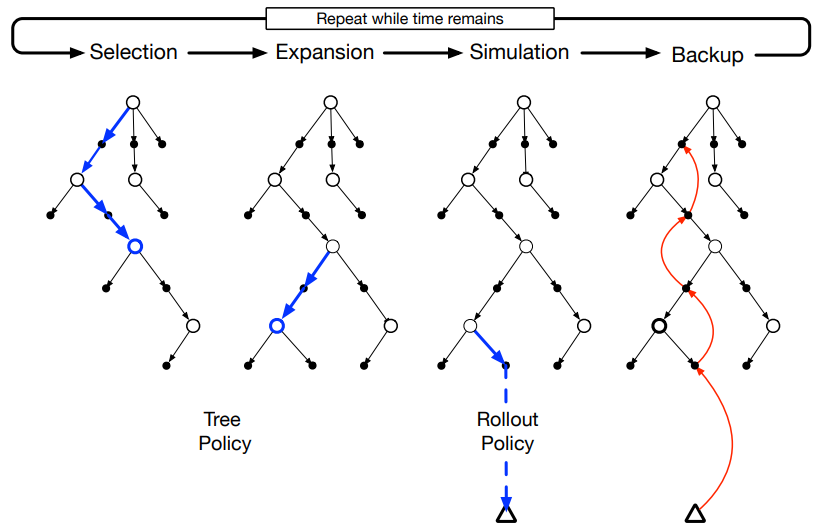

Some of its successful aplications are in <font color='blue'>[13]</font> and <font color='blue'>[14]</font> where the DeepMind based their algorithm in MCTS and enhanced with neural networks, namely, a value and policy network to be able to generalise and predict the outcomes of new states. They outperformed every state-of-the-art algorithms and beat human champions for the first time in the challenging game Go. 

### 4.5 AlphaGo Zero

This algorithm works in a similar fashion to MCTS above. The DeepMind team developed this algorithm in <font color='blue'>[14]</font> to show how pure reinforcement learning works without previous knowledge or human guidance. This algorithm outperformed and beat the previous algorithms again in Go and it started to discover common, ancient and even never seen strategies during the learning process.

In contrast to the previous version of the algorithm that used more than one neural network and supervised learning with past professional moves, AlphaGo Zero starts learning from scracth and only uses one neural network to guide the search in the MCTS. The neural network $f_\theta(s)$ receives the state of the board and outputs a tuple $(p, v)$ of the probabilities $p$ for selecting each action and a scalar evaluation $v$ that estimates the probability of the current player winning from the given state. Another difference from their previous algorithm is that it doesn't perform rollouts during the search. Also, the parameters of the neural network are updated every $c$ iterations to more closely match the improved search probabilities and selfplay winner given by the search tree (which is usually better than the neural network) and perform an evaluation step to check whether this new neural network performs better than the previous ones. Furthermore, it's trained in a self-play fashion and some Dirichlet noise is added to encourage more exploration: $P(s, a) = (1-\epsilon) p_a + \epsilon \eta_a$, where $\eta$ ~ $\text{Dir}(0.03)$ and $\epsilon = 0.25$. 

Apart from these changes, it shares big part of the process with its previous algorithm and MCTS. However, when we implemented this algorithm, we adapted it a bit: we initially train it against a random opponent (therefore we don't add Dirichlet noise), we don't perform an evaluation to check whether the new neural network performs better than the previous ones and we added exploring starts as a way of encouraging more exploration. Nevertheless, we are also able to train via self-play with Dirichlet noise and exploring starts.

## 5. Modelling and training

In this section we show how we train our agents in a $3$x$3$ board using an opponent that takes random actions. We perform this to have a baseline and track the performance of the agents: if our agents are playing optimally, they should never lose and win almost every game. In such a small board it makes sense that some of the games end up in a draw since even a random opponent can block the winning moves. It is also relevant to notice that the reward is a bad metric to test whether the agent is learning, because this depends on the opponnent's way of playing. However, for a $3$x$3$ board, we believe that it is a good baseline that provides insights on how well the agents are learning to win and never lose.

### 5.1 Q-Learning

In this section, we present our results using Q-Learning. We expect that it will not be able to handle the more complicated games, but it is a simple model that will serve as a baseline to compare against other models against.

#### 5.1.1 $3$x$3$ Board

We trained agents for both Q-Learning and Double Q-Learning to check whether their performance or learning process would be different in some sense. Also, we were interested in checking if the classical Q-Learning would overestimate the Q-values affecting negatively its performance. However, for a classical board of $3$x$3$ the learning of both agents didn't change drastically and was really fast. In only just 10000 episodes great results were achieved for both. The respective code with its results is shown below. 

We trained both Q-Learning and Double Q-Learning using the Independent Q-Learning approach found in <font color='blue'>[1]</font>, the MARL book, using a random opponent.

##### Q-Learning and Double Q-Learning functions

In [1]:
def Q_learning(env, episodes, show_every, epsilon, final_epsilon, decay, gamma, alpha):
    win = []
    q = {}
    
    rewards_qlearning = np.zeros(episodes)
    for ep in range(episodes):
        # Reset the environment for new episode
        s, av_actions, done = env.reset()
        # Save the available actions for each state
        if env.state_actions.get(s) == None:
            q = env.add_avaliable_actions(s, q)
        cumulative_r = 0
        while not done:
            # Pick action based on epsilon-greedy algorithm
            a = eps_greedy_policy(s, q, epsilon = epsilon)
            # Take action a
            next_s, av_actions, r, done = env.step(a)
            # Save the available actions for each state
            if env.state_actions.get(next_s) == None:
                q = env.add_avaliable_actions(next_s, q)
            cumulative_r += r
            if av_actions == []:
                break
            # Qlearning update
            q[s, a] += qlearning_update(q, s, a, r, next_s, av_actions, alpha = alpha, gamma = gamma)
            s = next_s
            if (ep+1) % show_every == 0:
                print(ep+1)
                env.showBoard()
                print(r)
        # Epsilon decay in every episode
        epsilon = max(final_epsilon, epsilon * decay)
        win.append(1) if r == 1 else win.append(0)
        rewards_qlearning[ep] = cumulative_r
    return rewards_qlearning, win, q

def Double_Q_learning(env, episodes, show_every, epsilon, final_epsilon, decay, gamma, alpha):
    
    win = []
    q1 = {}
    q2 = {}
    q = {}
    
    rewards_qlearning = np.zeros(episodes)
    for ep in range(episodes):
        # Reset the environment for new episode
        s, av_actions, done = env.reset()
        # Save the available actions for each state
        if env.state_actions.get(s) == None:
            q1 = env.add_avaliable_actions(s, q1)
            q2 = env.add_avaliable_actions(s, q2)
            q = env.add_avaliable_actions(s, q)
        cumulative_r = 0
        while not done:
            # Pick action based on epsilon-greedy algorithm
            a = eps_greedy_policy(s, q, epsilon = epsilon)
            # Take action a
            next_s, av_actions, r, done = env.step(a)
            # Save the available actions for each state
            if env.state_actions.get(next_s) == None:
                q1 = env.add_avaliable_actions(next_s, q1)
                q2 = env.add_avaliable_actions(next_s, q2)
                q = env.add_avaliable_actions(next_s, q)

            cumulative_r += r
            if av_actions == []:
                break  
            # Double Qlearning update
            if np.random.random() <= 0.5:
                max_action = max_q_action(q1, next_s)
                q1[s, a] += alpha * (r + gamma * q2[next_s, max_action] - q1[s, a])
            else:
                max_action = max_q_action(q2, next_s)
                q2[s, a] += alpha * (r + gamma * q1[next_s, max_action] - q2[s, a])
            q[s, a] = q1[s, a] + q2[s, a]
            
            s = next_s
            if (ep+1) % show_every == 0:
                print(ep+1)
                env.showBoard()
                print(r)
                
        # Epsilon decay in every episode
        epsilon = max(final_epsilon, epsilon * decay)
        win.append(1) if r == 1 else win.append(0)
        rewards_qlearning[ep] = cumulative_r
    return rewards_qlearning, win

def max_q_action(q, s):
    max_q_val = -10e10
    for new_a in env.state_actions[s]:
        if q[s, new_a] > max_q_val:
            max_q_val = q[s, new_a]
            action = new_a
    return action

def eps_greedy_policy(s, q, epsilon = 0.1):
    if np.random.binomial(1, epsilon) == 1:
        rand_ = np.random.randint(0, len(env.state_actions[s]))
        action = env.state_actions[s][rand_]
    else:
        action = max_q_action(q, s)
    return action
    
def qlearning_update(q, s, a, r, next_s, av_actions, alpha = 0.1, gamma = 0.9):
    max_action = max_q_action(q, next_s)   
    new_q = q[next_s, max_action]
    return alpha * (r + gamma * new_q - q[s, a])

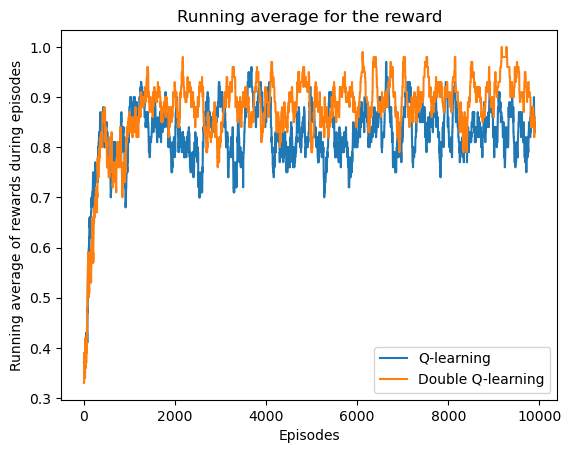

In [2]:
from QLearning_env import *
import numpy as np
import matplotlib.pyplot as plt

rows = 3
cols = rows
episodes = 10000
show_every = episodes + 1

# Hyperparameters
epsilon = 0.8
final_epsilon = 0.05
decay = 0.99
gamma = 0.8
alpha = 0.1

#print('---------------------Q-learning---------------------')
env = BoardQ(rows, cols)
rewards_qlearning, win_qlearning, q_values_qlearning = Q_learning(env, episodes, show_every, epsilon, final_epsilon, decay, gamma, alpha)

#print('---------------------Double Q-learning---------------------')
env = BoardQ(rows, cols)
rewards_double_qlearning, win_double_qlearning = Double_Q_learning(env, episodes, show_every, epsilon, final_epsilon, decay, gamma, alpha)

N = round(episodes/100)
Q_running_average = np.convolve(rewards_qlearning, np.ones(N)/N, mode='valid')
doubleQ_running_average = np.convolve(rewards_double_qlearning, np.ones(N)/N, mode='valid')
plt.figure()
plt.plot(Q_running_average)
plt.plot(doubleQ_running_average)
legend_str = ['Q-learning', 'Double Q-learning']
plt.legend(legend_str)
plt.title('Running average for the reward')
plt.xlabel('Episodes')
plt.ylabel('Running average of rewards during episodes')
plt.show()

As can be seen in the plot above, the Double Q-Learning implementation doesn't a big significant difference. Also, since it requires at least double of memory to start the Q-values than the Q-Learning, we have decided to discard this model for future comparisons. The Q-Learning itself is learning to play almost optimally in even less than 10000 episodes, which is very practical. Our modelling approach includes an $\epsilon$ that decays through every episode.

To achieve good results, it took a lot of tuning of the hyperparameters. Whilst tuning, we found a sharp trade-off between the exploration rate and the quality of the learning. While a high exploration rate allows the agent to explore almost all of the states, it does not allow the agent to refine their optimal strategy enough to defend against all strategies of the other agent. With a fixed learning rate throughout, we need it high enough to explore lots of states at the start, but also not too large that it cannot learn an optimal strategy at the end. We found that a good value was 0.1, which achieved a draw rate of over 80% afer learning for 100,000 iterations. We should note that the rate will never be 100% due to the random moves which can lead to a win for the other player. However, we noticed a great deal of variability in results due to this high exploration in the latter iterations. 

To this end, we used a variable exploration rate strategy that decreases during learning. This allows the agents to have an extremely high exploration state at the start, but still learn a good strategy. Specifically, starting with an exploration rate of 0.4, we decrease it to 0.2, 0.1, 0.05, 0.02, 0.01 with the decrements every 50,000 iterations - a total of 300,000 iterations. Below we show that using this strategy allows the agent to explore almost all of the possible board states $-$ 5275 out of 5477.

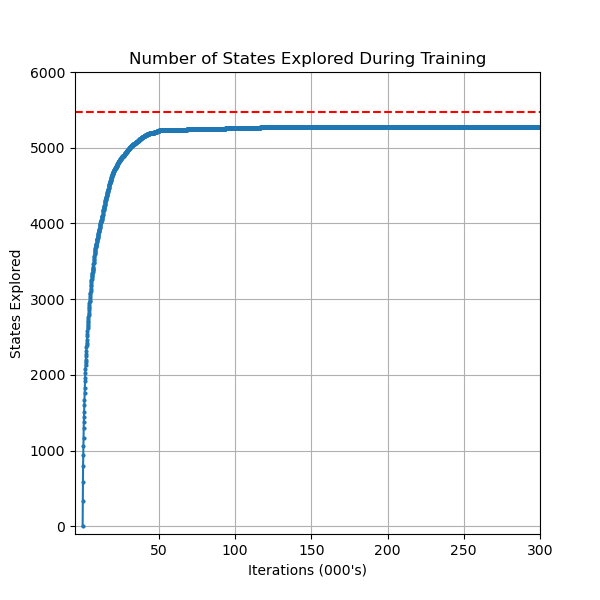

Below, we present our results of the training process. We observed a drastic improvement in learning over the fixed exploration rate, and the graph almost looks like a step function due to the decreased randomness. Within each step we still observe some learning, however we see that most of the learning is due to refinements in strategy now that the agents are playing fewer random moves. This relative flatness between steps provides evidence that our agents have learnt a nearly optimal strategy.

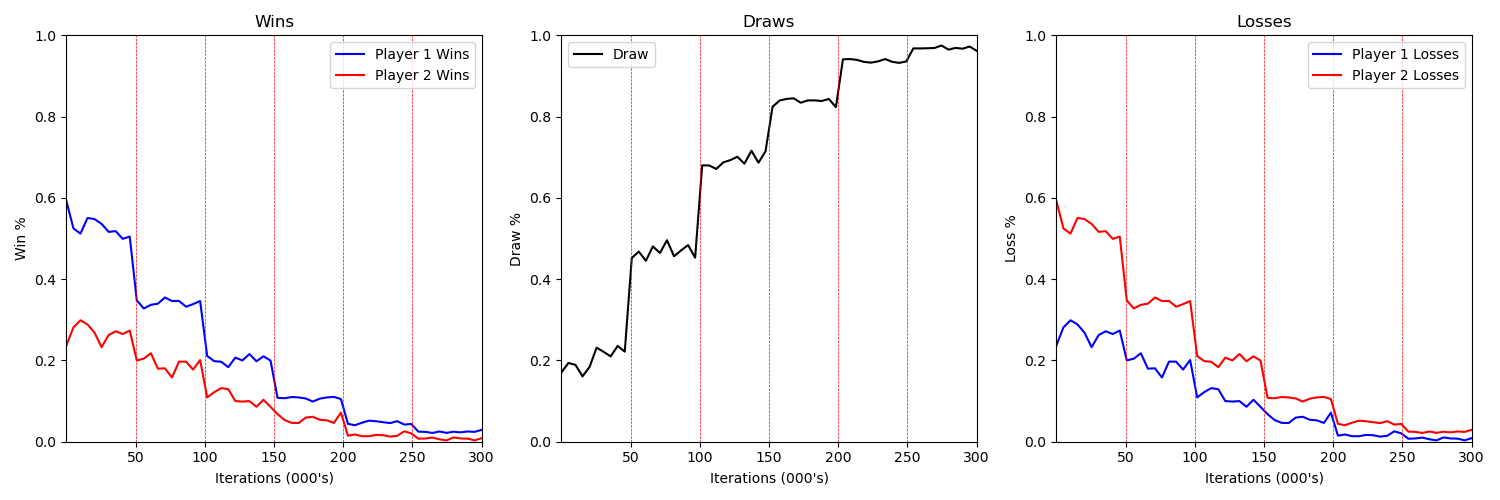

We observe a drastic improvement in learning, and the graph almost looks like a step function due to the decreased randomness in the moves. Within each step we still observe some learning, however we see that most of the learning is due to refinements in strategy now that the agents are playing fewer random moves. This relative flatness between steps provides evidence that our agents have learnt a nearly optimal strategy.

These graphs show very promising results, and we can see that the agents have mostly learnt how to prevent losses. Overall, they achieve a 96.8% draw rate whilst having an exploration rate of 1%. We briefly discuss the impact that the exploration has on our metrics. Let us suppose that we are between 150,000 and 200,000 iterations so have an exploration rate of 5% for both players. This means that approximately 1 in 10 moves (0.05x2) are completely at random. Since most games end in draws, there are 9 moves played - so for simplicitly we can approximate this as _1 random move per game_. Despite this, the player is still able to recover a draw from this random move in most cases.

Now we contextualise an exploration rate of 1%. This means that across both players, approximately 1 in 50 moves will be at random - so roughly 18% of games will have a random move. We contrast this to the 96.8% draw rate we achieved, which shows that our agents have learnt a wide range of strategies. We attribute this robustness of our models to the high exploration we allowed for in the early stages of learning.

We then tested this first model by playing against it ourselves. While the results were reassuring that the agent has mostly learnt how to play well, it was still possible to beat it. By playing the agent enough times, we were able to figure out the strategy that the agent played, and importantly, how to beat this strategy. We still had work to do.

We now compare these results to another experiment we ran. Given that we know the optimal strategy results in draws, how can we use this information to speed up the learning? Recalling the Q-Learning update rule, we can tune the current reward for a draw to promote learning how to draw as well as win. Throughout all models, we used a reward of +1 for a win, and -1 for a loss. For this first model we have just described, we rewarded player 1 less than player 2 for a draw due to the first mover advantage, with rewards 0.1 and 0.5 for players 1 and 2, respectively. 

We compare this to the learning process (shown below) using a reward for a draw of 0.8 for both players. As expected, we observe that the draw rate is noticeably higher in the earlier stages of learning as board states which lead to a draw are more appealing to the agent. 

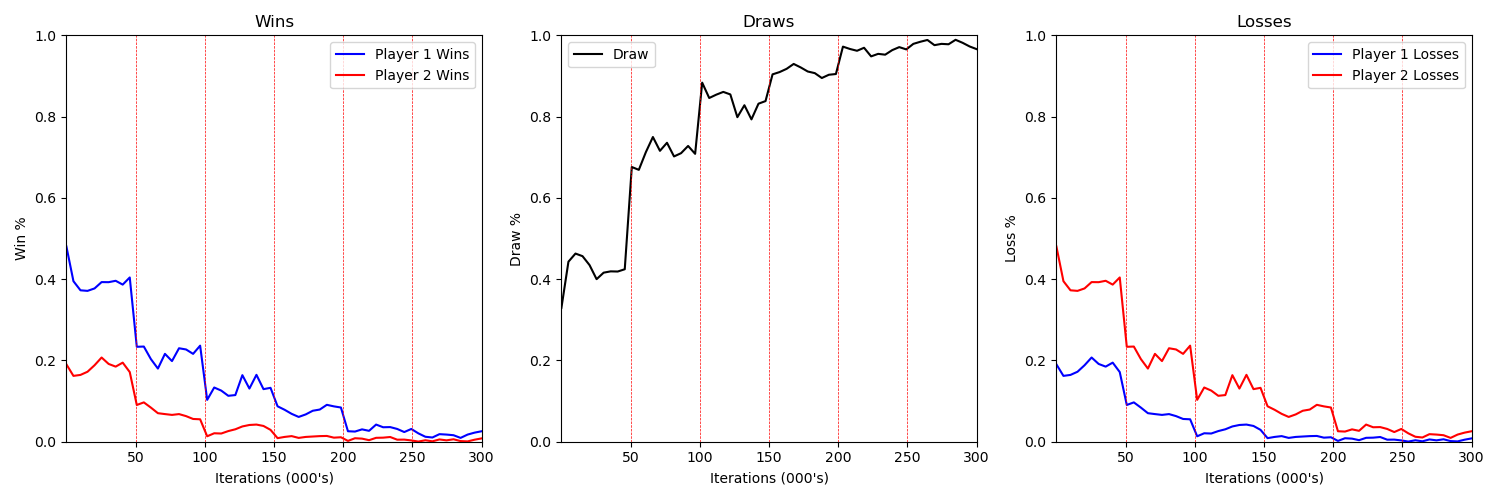

We then decided to play against it ourselves to test whether the agents are actually able to compete against humans. We first played against it ourselves, which showed that our own Tic-Tac-Toe skills needed some work - but that our model is performing very well. The next challenge for it was playing against an optimal play engine found online and other such resources. We describe the strategy and our findings just after this next section which allows you to play the agent. 

### Now it's time for you to play!
- When entering your move, please choose an empty square, or it will ask you to try again.
- The row and column entries take values 1 to 3.
- Note: you will need to clone this repo to load the saved model and the code was adapted from https://towardsdatascience.com/reinforcement-learning-implement-tictactoe-189582bea542

In [1]:
import pickle
import numpy as np

BOARD_ROWS = 3
BOARD_COLS = 3

def load_players(filename1, filename2):
    with open(filename1, 'rb') as f1, open(filename2, 'rb') as f2:
        player1 = pickle.load(f1)
        player2 = pickle.load(f2)
    return player1, player2

class Player:
    def __init__(self, name, exp_rate=0.4):
        self.name = p1
        self.states = [] 
        self.lr = 0.1
        self.exp_rate = exp_rate
        self.decay_gamma = 0.9
        self.states_value = {}  
    def getHash(self, board):
        boardHash = str(board.reshape(BOARD_COLS * BOARD_ROWS))
        return boardHash

    def chooseAction(self, positions, current_board, symbol):
        if np.random.uniform(0, 1) <= self.exp_rate:
            # take random action
            idx = np.random.choice(len(positions))
            action = positions[idx]
        else:
            value_max = -999
            for p in positions:
                next_board = current_board.copy()
                next_board[p] = symbol
                next_boardHash = self.getHash(next_board)
                value = 0 if self.states_value.get(next_boardHash) is None else self.states_value.get(next_boardHash)
                if value >= value_max:
                    value_max = value
                    action = p
        return action

        
class State:
    def __init__(self, p1, p2):
        self.board = np.zeros((BOARD_ROWS, BOARD_COLS))
        self.p1 = p1
        self.p2 = p2
        self.isEnd = False
        self.boardHash = None
        # init p1 plays first
        self.playerSymbol = 1
        self.explored = []
        self.results = []

    # get unique hash of current board state
    def getHash(self):
        self.boardHash = str(self.board.reshape(BOARD_COLS * BOARD_ROWS))
        return self.boardHash

    def winner(self):
        # row
        for i in range(BOARD_ROWS):
            if sum(self.board[i, :]) == 3:
                self.isEnd = True
                self.results.append(1)
                return 1
            if sum(self.board[i, :]) == -3:
                self.isEnd = True
                self.results.append(-1)
                return -1
        # col
        for i in range(BOARD_COLS):
            if sum(self.board[:, i]) == 3:
                self.isEnd = True
                self.results.append(1)
                return 1
            if sum(self.board[:, i]) == -3:
                self.isEnd = True
                self.results.append(-1)
                return -1
        # diagonal
        diag_sum1 = sum([self.board[i, i] for i in range(BOARD_COLS)])
        diag_sum2 = sum([self.board[i, BOARD_COLS - i - 1] for i in range(BOARD_COLS)])
        diag_sum = max(abs(diag_sum1), abs(diag_sum2))
        if diag_sum == 3:
            self.isEnd = True
            if diag_sum1 == 3 or diag_sum2 == 3:
                self.results.append(1)
                return 1
            else:
                self.results.append(-1)
                return -1

        # tie
        # no available positions
        if len(self.availablePositions()) == 0:
            self.isEnd = True
            self.results.append(0)
            return 0
        # not end
        self.isEnd = False
        return None

    def availablePositions(self):
        positions = []
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                if self.board[i, j] == 0:
                    positions.append((i, j))  # need to be tuple
        return positions

    def updateState(self, position):
        self.board[position] = self.playerSymbol
        # switch to another player
        self.playerSymbol = -1 if self.playerSymbol == 1 else 1

    # play with human
    def play2(self):
        while not self.isEnd:
            # Player 1
            positions = self.availablePositions()
            p1_action = self.p1.chooseAction(positions, self.board, self.playerSymbol)
            # take action and upate board state
            self.updateState(p1_action)
            self.showBoard()
            # check board status if it is end
            win = self.winner()
            if win is not None:
                if win == 1:
                    print(self.p1.name, "wins!")
                else:
                    print("tie!")
                break

            else:
                # Player 2
                positions = self.availablePositions()
                p2_action = self.p2.chooseAction(positions)

                self.updateState(p2_action)
                self.showBoard()
                win = self.winner()
                if win is not None:
                    if win == -1:
                        print(self.p2.name, "wins!")
                    else:
                        print("tie!")
                    break

    def showBoard(self):
        # p1: x  p2: o
        for i in range(0, BOARD_ROWS):
            print('-------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = 'x'
                if self.board[i, j] == -1:
                    token = 'o'
                if self.board[i, j] == 0:
                    token = ' '
                out += token + ' | '
            print(out)
        print('-------------')
        
class HumanPlayer:
    def __init__(self, name):
        self.name = name

    def chooseAction(self, positions):
        while True:
            row = int(input("Input your action row:")) - 1
            col = int(input("Input your action col:")) - 1
            action = (row, col)
            if action in positions:
                return action
    
# Load trained models
computer_player1, computer_player2 = load_players('Notebooks/test_player1.pkl', 'Notebooks/test_player2.pkl')
chengchun = HumanPlayer("Chengchun")

In [2]:
game = State(computer_player1, chengchun)
game.play2()

-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
| x |   |   | 
-------------
Input your action row:2
Input your action col:2
-------------
|   |   |   | 
-------------
|   | o |   | 
-------------
| x |   |   | 
-------------
-------------
|   |   | x | 
-------------
|   | o |   | 
-------------
| x |   |   | 
-------------
Input your action row:2
Input your action col:3
-------------
|   |   | x | 
-------------
|   | o | o | 
-------------
| x |   |   | 
-------------
-------------
|   |   | x | 
-------------
| x | o | o | 
-------------
| x |   |   | 
-------------
Input your action row:1
Input your action col:1
-------------
| o |   | x | 
-------------
| x | o | o | 
-------------
| x |   |   | 
-------------
-------------
| o |   | x | 
-------------
| x | o | o | 
-------------
| x |   | x | 
-------------
Input your action row:3
Input your action col:2
-------------
| o |   | x | 
-------------
| x | o | o | 
-------------
| x | o | x | 
-------------


### Spoiler: The Optimal Strategy
We can now fully describe the optimal strategy an agent should play.

* Player 1: Play in any corner
* Player 2: the only one move which does not lead to a forced win for player 2 is the centre square. All other moves lead to a win for player 1.

We find that our agent has learnt this strategy. We attempted to obtain a draw by playing in any of the non-centre squares, but the agent plays a sequence of moves that force us to respond in order to prevent losing in the next move. When we play in the centre square, we are able to get a draw by playing moves that force the agent to prevent a loss. These results give us sufficient evidence that we have solved the game for player 1.

We trained this model using self-play, so we also obtained an agent who learnt strategies as player 2. Unfortunately, our results are not as promising as it has not learnt that the only move that does not lead to a loss is the centre square. Through playing against it enough times, we were able to find how to beat it. Interestingly, the initial model (lower reward for a draw) performs better and is able to identify that the optimal response to player 1 placing in the corner is to play in the centre square. After this move, the best move for player 1 is to play in the opposing corner - to which player 2 should respond by playing in an *non-corner*. This forces player 1 to prevent a loss. We show this sequence of moves being played by the agent below.

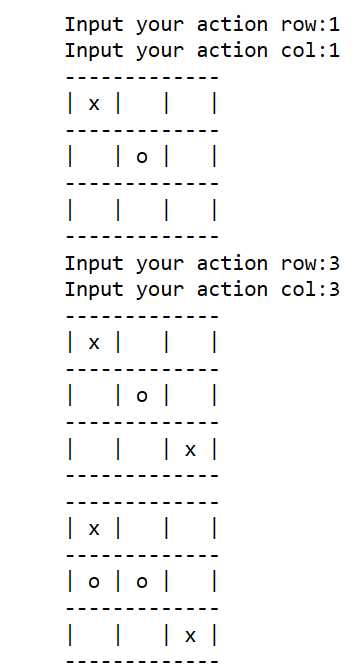

#### 5.1.2 Multiple Board Q-Learning

We now attempt 2-board Tic-Tac-Toe using Q-Learning. We didn't think that we would be able to achieve any good learning - and that is exactly what we found. We find that in the 300,000 iterations, we explored almost 250,000 states - meaning that each state is only visited just over once each, so we can surely not have good learning. Furthermore, recall that there are over 387 million possible states. Even if only 10% of these states are valid, our 250,000 states explored is nowhere near the 38.7 million we seek to explore. 

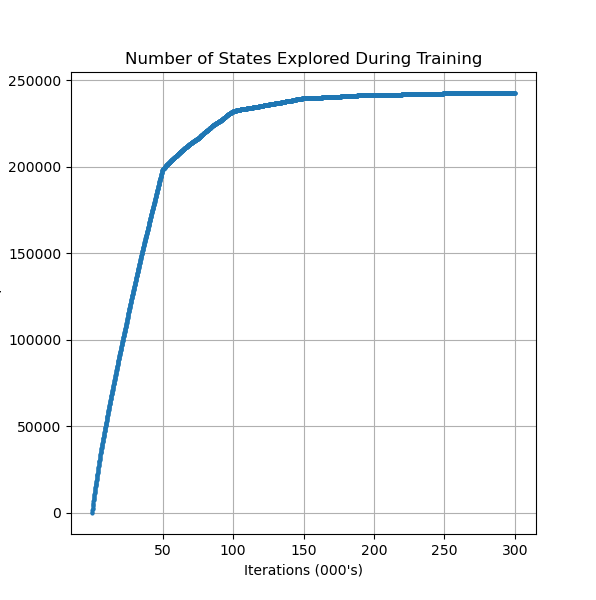

Below, we present the learning of our agents. This highlights a very important observation: that a high draw % does not necessarily indicate good learning. Even though we see that there is almost a 90% draw rate, the trained agent plays extremely poor moves. This shows that the lack of exploration of the state space has caused the agents to become stuck in a poor local minima. To improve this, we would ideally train the agents for many more iterations, although this is not possible as we are constrained by computational power. Training these agents took an hour and a half, so to learn a strategy that can compete with humans will take far too long. We therefore disregard the idea that multiple board Tic-Tac-Toe can be solved with Q-Learning.

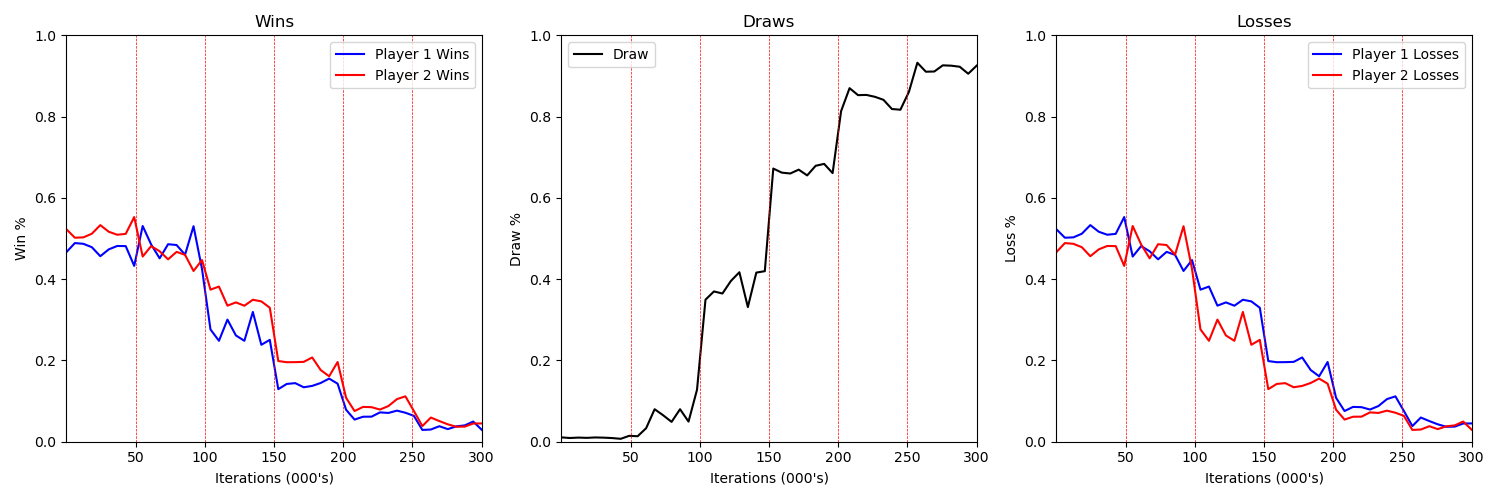

### 5.2 Neural Q-Fitted Iteration

In this subsection we show the performance of the agent trained by NFQ. This algorithm is able to generalise and handle complex and continuous state and action spaces, however it trains a neural network from scratch and hence its training time is long. We don't expect better results other than the ones in DQN or MCTS for large setup of boards.

The next function implements the algorithm and generates the data to perform the estimations. Since we don't account for a good policy to generate the data from, we proceed to generate the data using a random policy at every step, which may be a reason of low performance if there is.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

from NFQ_env import *

def gen_data(env, episodes):
    D = {}
    for i in range(episodes):
        D[i] = []
        # Reset the environment for new episode
        s, av_actions, done = env.reset()
        a = env.actions[np.random.randint(0, len(av_actions))]
        done = False
        while not done:
            s_input = env.board.reshape(rows * cols)
            # Select random action
            a = env.actions[np.random.randint(0, len(av_actions))]
            # Take action a
            next_s, av_actions, r, done = env.step(a)
            next_s_input = env.board.reshape(rows * cols)
            # Saves observations  of the environment in the form (S_t, a_t, S_{t+1}, done)
            D[i].append([s_input, list(a), next_s_input, r, done])

            s = next_s
    return D

def initialisation(D):
    # This are the inputs of the NNs of the form (S_t, a_t)
    input = [list(D[ep][step][0]) + D[ep][step][1] for ep in range(gen_episodes) for step in range(len(D[ep]))]
    
    # Tuples of the next state and action
    next_S = [D[ep][step][2] for ep in range(gen_episodes) for step in range(len(D[ep]))]
    a = [D[ep][step][1] for ep in range(gen_episodes) for step in range(len(D[ep]))]

    pred_input = [list(D[ep][step][2]) + D[ep][step][1] for ep in range(gen_episodes) for step in range(len(D[ep]))]
    # Target (the initial target is set to be 1, it will include the future in the next iterations)
    target = [D[ep][step][3] for ep in range(gen_episodes) for step in range(len(D[ep]))]
    r = target
    # Wheter next state is terminal or not
    done = [D[ep][step][4] for ep in range(gen_episodes) for step in range(len(D[ep]))]
    
    # Training of NN using input and target
    regr = MLPRegressor(random_state=1, max_iter=500).fit(input, target)

    # Prediction using NN just trained
    Q_hat = regr.predict(pred_input)

    return input, Q_hat, next_S, done, pred_input, r


# Calculates the TD target 
def calc_target(gamma, Q_hat, r):
    y = []
    for i in range(len(Q_hat)):
        y.append(r[i] + gamma * Q_hat[i])
    return y

# Receives the regressors of the NN and a state to estimate its qfunction
# Returns the action with the highest estimated Qvalue 
def approximated_optimal_policy(regr, input):
    input = input.reshape(1, -1) 
    return regr.predict(input)

def NFQ(gamma, Q_iterations, D):
    input, Q_hat, next_S, done, pred_input, r = initialisation(D)
    regressors = []
    for i in range(1, Q_iterations + 1):
        Q_est = Q_hat 
        target = calc_target(gamma, Q_est, r)
        # Trainig of the NN with TD target and input are states
        regr = MLPRegressor(random_state=1, max_iter=500).fit(input, target)
        # Prediction of Q_value functions for each action 
        Q_hat = regr.predict(pred_input)
        # Saves the regressors of the NN trained
        regressors.append(regr)
    return regressors

In [2]:
# We generate the data
rows = 3
cols = rows
env_NFQ = Board_NFQ(rows, cols)
gen_episodes = 10000
D = gen_data(env_NFQ, gen_episodes)

# We perform NFQ
gamma = 0.9
Q_iterations = 10
regressors = NFQ(gamma, Q_iterations, D)

In the next part we evaluate the last set of regressors obtained.

In [3]:
from collections import deque
episodes = 1000
rewards_fittedq = {}
rewards_ep = np.zeros(episodes)

regr = regressors[-1]
scores_window = deque(maxlen = 100)

cumulative_r_eps = 0
for ep in range(episodes):
    # Reset the environment for new episode
    s, av_actions, done = env_NFQ.reset()
    cumulative_r = 0
    while not done:
        # Pick action based on epsilon-greedy algorithm
        if np.random.random() < 0.01:
            a = av_actions[np.random.randint(0, len(av_actions))]
        else:
            max_val = -10e6
            s = list(env_NFQ.board.reshape(rows**2))
            for action in list(env_NFQ.actions):
                input = np.array(s + list(action))
                q_value = approximated_optimal_policy(regr, input)
                if q_value >= max_val:
                    q_value = max_val
                    a = action
        # Take action a
        next_s, av_actions, r, done = env_NFQ.step(a)
        cumulative_r += r
        if ep % 500 == 0: 
            env_NFQ.showBoard()
        if av_actions == []:
            break
        s = next_s
        
    rewards_ep[ep] += cumulative_r
    scores_window.append(r)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)), end="")
    
    if ep % 500 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)))


------------
|   |   |   | 
------------
|   | o |   | 
------------
|   |   | x | 
------------
------------
|   |   |   | 
------------
|   | o |   | 
------------
| o | x | x | 
------------
------------
|   |   | o | 
------------
|   | o | x | 
------------
| o | x | x | 
------------
Episode 0	Average Score: -1.00
Episode 499	Average Score: 0.63------------
|   |   |   | 
------------
|   |   |   | 
------------
|   | o | x | 
------------
------------
|   |   | o | 
------------
|   |   |   | 
------------
| x | o | x | 
------------
------------
|   |   | o | 
------------
|   | o | x | 
------------
| x | o | x | 
------------
------------
|   | o | o | 
------------
| x | o | x | 
------------
| x | o | x | 
------------
Episode 500	Average Score: 0.61
Episode 999	Average Score: 0.56

Text(0.5, 1.0, 'Evaluation of the DQN agent')

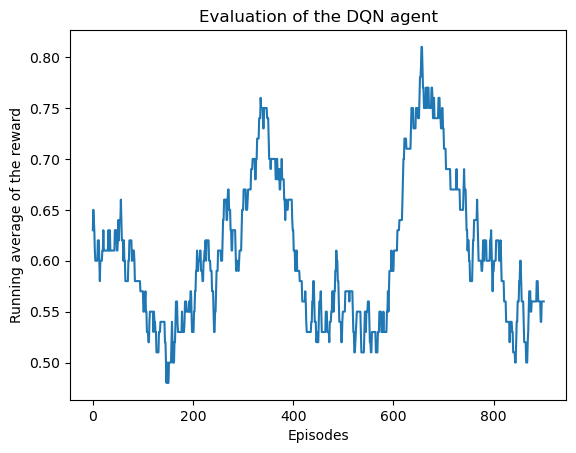

In [4]:
N = 100
plt.figure()
ep_running_average = np.convolve(rewards_ep, np.ones(N)/N, mode='valid')
plt.plot(ep_running_average)
plt.xlabel('Episodes')
plt.ylabel('Running average of the reward')
plt.title('Evaluation of the DQN agent')

After a few iterations, and by adding some randomness with the $\epsilon$-greedy algorithm, the agent performs poorly against the random opponent. By having this trainning the agent should barely loose and win, if not all, most of the games. For this reason, and for the computational unefficieny, this algorithm is discarded for larger setups of the game.

### 5.3 Deep Q-Network (DQN)

In this subsection we show the performance of the agent trained by DQN. The agent is usually able to win almost every game, with some draws and loses at the beginning during its exploration stage.

The next function implements the algorithm.

In [1]:
def dqn(n_episodes = 10000, max_t = 1000, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.999):
#   """Deep Q-Learning. 
#    Params
#    ======
#        n_episodes (int): maximum number of training episodes
#        max_t (int): maximum number of timesteps per episode
#        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
#        eps_end (float): minimum value of epsilon
#        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
#    """
    agent = Agent(input_size = (rows ** 2 + 2), seed=0)
    every = 500
    
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen = every)  # last 500 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        s, av_actions, done = env_DQN.reset()
        score = 0
        for t in range(max_t):
            s = list(env_DQN.board.reshape(env_DQN.rows ** 2))
            
            action = agent.max_action(s, av_actions, eps)
            
            next_s, av_actions, r, done = env_DQN.step(action)
            next_s = list(env_DQN.board.reshape(env_DQN.rows ** 2))
            
            agent.step(s, action, r, next_s, done, av_actions)
            
            s = next_s
            score += r
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay * eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            if np.mean(scores_window)>=0.90:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
                break
    return scores

In [2]:
from DQN_env import *
rows = 3
cols = rows
env_DQN = Board_DQN(rows, cols)
scores = dqn(n_episodes = 5000, max_t = 1000, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.999)

Episode 500	Average Score: 0.40
Episode 1000	Average Score: 0.57
Episode 1500	Average Score: 0.67
Episode 2000	Average Score: 0.78
Episode 2500	Average Score: 0.83
Episode 3000	Average Score: 0.86
Episode 3500	Average Score: 0.80
Episode 4000	Average Score: 0.83
Episode 4500	Average Score: 0.86
Episode 5000	Average Score: 0.81


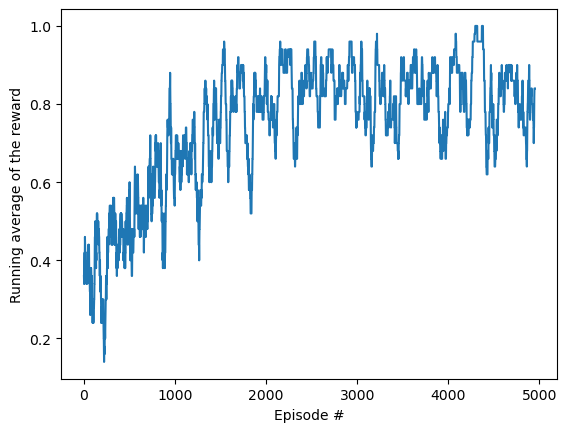

In [3]:
# plot the scores
N = round(len(scores)/100)
DQN_running_average = np.convolve(scores, np.ones(N)/N, mode='valid')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(DQN_running_average)
plt.ylabel('Running average of the reward')
plt.xlabel('Episode #')
plt.show()

From the plot above, it is noticeable how the agent performs poorly at the beginning. It starts with full exploration (basic two random agents playing against each other) but after it explores and starts to exploit all the collected information, starts to perform better against the random opponent. This approach is promising in some sense since it is able to generalise and scale the problem to larger configurations. This algorithm will be compared further.

### 5.4 Monte Carlo Tree Search with exploring starts

Now, we show how the MCTS performs during training against a random agent in the classical $3$x$3$ board with random starts in some iterations to encourage exploration. If the agent plays well enough, it should never lose against the random opponent, but since it is a relatively small board it is possible that even playing optimally they draw. This means that the average reward should be high enough and the lose rate low (since the agent is still learning). Note that we show two samples of the board and how the MCTS agent playing `X`, makes decisions to win against the random opponent playing `O`.

In [4]:
from MCTS import *
import numpy as np

rows = 3

cols = rows
env_MCTS = Board_MCTS(rows, cols)
player_MCTS = MCTSPlayer(c_puct = 3, n_playout = 80)

episodes = 500
last_ep = 100

# Exploring starts every
expl_every = 10
exploring_starts = False


rewards_MCTS = np.zeros(episodes)
scores_window = deque(maxlen=last_ep)

for ep in range(1, episodes + 1):

    s, av_actions, done = env_MCTS.reset()
    player_MCTS.reset_player()

    if ep % expl_every == 0:
        exploring_starts = True
    else:
        exploring_starts = False
    
    while not done:
        # Monte Carlo tree search
        a = player_MCTS.get_action(env_MCTS)
        next_s, av_actions, r, done = env_MCTS.step(a)

        # Random opponent
        if av_actions != [] and not done:
            opp_a = av_actions[random.randint(0, len(av_actions) - 1)]
            next_s, av_actions, r, done = env_MCTS.step(opp_a)
            player_MCTS.mcts.update_with_move(opp_a)
        if ep % (episodes / 2) == 0:
            env_MCTS.showBoard()
    
    rewards_MCTS[ep-1] = r
    scores_window.append(r)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)), end="")
    
    if ep % last_ep == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)))

Episode 100	Average Score: 0.98
Episode 200	Average Score: 0.97
Episode 249	Average Score: 0.95------------
|   |   |   | 
------------
|   | x |   | 
------------
|   | o |   | 
------------
------------
|   |   | o | 
------------
|   | x |   | 
------------
| x | o |   | 
------------
------------
| x |   | o | 
------------
| o | x |   | 
------------
| x | o |   | 
------------
------------
| x |   | o | 
------------
| o | x |   | 
------------
| x | o | x | 
------------
Episode 300	Average Score: 0.96
Episode 400	Average Score: 1.00
Episode 499	Average Score: 0.95------------
|   |   |   | 
------------
|   | x |   | 
------------
|   |   | o | 
------------
------------
|   |   |   | 
------------
|   | x |   | 
------------
| x | o | o | 
------------
------------
|   |   | x | 
------------
|   | x |   | 
------------
| x | o | o | 
------------
Episode 500	Average Score: 0.95


In [5]:
win_rate = 0
draw_rate = 0
lose_rate = 0
for i in rewards_MCTS:
    if i == 1:
        win_rate += 1
    elif i == 0:
        draw_rate += 1
    else:
        lose_rate += 1
win_rate = win_rate/len(rewards_MCTS)
lose_rate = lose_rate/len(rewards_MCTS)
draw_rate = draw_rate/len(rewards_MCTS)
print('win rate', win_rate)
print('lose rate', lose_rate)
print('draw_rate', draw_rate)

win rate 0.982
lose rate 0.01
draw_rate 0.008


The results from the MCTS are very promising. From the beginning it has a very high performance and it almost never lose any game even during the learning stage. Also it is very relevant its computational efficiency, it only requires about 5000 episodes to train, in contrast to DQN that we ran for 5000 episodes and it didn't even achieved such a high winning rate in the end of its iterations. This algorithm is very promising and will be further analysed.

### 5.5 Last but not least: AlphaGo Zero with exploring starts

Here we show our implementation of the AlphaGo Zero algorithm with some modifications as mentioned further above. To show the potential of this algorithm, we evaluate it against a random opponent as a baseline, again. We use a neural network that guides the search in the tree: it receives the state as an input and outputs a vector of probabilities for each available action and a value that estimates the probability of winning for the current player. The modifications to the original algorithm include: firstly, in this part we are training the algorithm against a random opponent and not via self-play, this means that we are not using Dirichlet noise for exploration (altough we have implemented it for later use). Secondly, we are adding the exploring starts approach to encourage exploration. Thirdly, we don't keep track of the best agents (best weights in the neural network), instead in the training step we adopt the last set of weights for the neural network.

In [1]:
def collect_selfplay_data(env, player, show_board = False):
    """collect self-play data for training"""
    states, mcts_probs, current_players = [], [], []

    done = False
    while not done:
        move, move_probs = player.get_action(env, return_prob=True)
        # store the data
        states.append(list(env.board.reshape(env.rows ** 2)))
        mcts_probs.append(list(move_probs))
        current_players.append(env.player)
        
        # perform a move
        next_s, av_actions, r, done = env.step(move)
        
        # Random opponent
        if av_actions != [] and not done:
            opp_act = av_actions[random.randint(0, len(av_actions) - 1)]
            next_s, av_actions, r, done = env.step(opp_act)
            player.mcts.update_with_move(opp_act)

            
            states.append(list(env.board.reshape(env.rows ** 2)))
            mcts_probs.append(list(move_probs))
            current_players.append(env.player)

        if show_board:
            env.showBoard()
            
    winners_z = np.zeros(len(current_players))
    if env.reward != 0:
        winners_z[np.array(current_players) == env.reward] = 1.0
        winners_z[np.array(current_players) != env.reward] = -1.0

    play_data = zip(states, mcts_probs, winners_z)
    play_data = list(play_data)[:]
    return env.reward, play_data

def policy_update(mini_batch, policy_fun):
    """update the policy-value net"""
    state_batch = [data[0] for data in mini_batch]
    mcts_probs_batch = [data[1] for data in mini_batch]
    winner_batch = [data[2] for data in mini_batch]
    s = np.ascontiguousarray(np.array(state_batch).reshape(-1, 1, rows, rows))
    
    old_probs, old_v = policy_fun.policy_value(s)
    for i in range(5):
        loss, entropy = policy_fun.train_step(s, mcts_probs_batch, winner_batch, env_AlphaGo.learn_rate * env_AlphaGo.lr_multiplier)
        new_probs, new_v = policy_fun.policy_value(s)


        kl = np.mean(np.sum(old_probs * (np.log(old_probs + 1e-10) - np.log(new_probs + 1e-10)), axis=1))
        if kl > env_AlphaGo.kl_targ * 4:  # early stopping if D_KL diverges badly
            break

    # adaptively adjust the learning rate
    if kl > env_AlphaGo.kl_targ * 2 and env_AlphaGo.lr_multiplier > 0.1:
        env_AlphaGo.lr_multiplier /= 1.5
    elif kl < env_AlphaGo.kl_targ / 2 and env_AlphaGo.lr_multiplier < 10:
        env_AlphaGo.lr_multiplier *= 1.5

    explained_var_old = (1 -
                         np.var(np.array(winner_batch) - old_v.flatten()) /
                         np.var(np.array(winner_batch)))
    explained_var_new = (1 -
                         np.var(np.array(winner_batch) - new_v.flatten()) /
                         np.var(np.array(winner_batch)))
    return loss, entropy

In [2]:
from AlphaGo_Zero import *

rows = 3
cols = rows
env_AlphaGo = Board_AlphaGo(rows, cols)

policy_fun_AlphaGo = PolicyValueNet(rows, cols)
player_AlphaGo = MCTSPlayer(policy_fun_AlphaGo.policy_value_fn, c_puct = 5, n_playout = 2000, is_selfplay = False)#True)

episodes = 40
# Show every 
last_ep = 20
# Train step for the neural net
update_nn_every = 20
# Exploring starts every
expl_every = 10
exploring_starts = False
show_board = False


rewards_MCTS = np.zeros(episodes)
scores_window = deque(maxlen=max(last_ep, 100))

for ep in range(1, 1 + episodes):
    env_AlphaGo.reset()
    player_AlphaGo.reset_player()

    
    if ep % last_ep == 0:
        show_board = True
    elif ep % expl_every == 0:
        exploring_starts = True
    else:
        show_board = False
        exploring_starts = False
    
    # Exploring starts to encourage more exploration
    if exploring_starts:
        expl_act = env_AlphaGo.actions[random.randint(0, len(env_AlphaGo.actions) - 1)]
        env_AlphaGo.step(expl_act)
        player_AlphaGo.mcts.update_with_move(expl_act)
        
        expl_act2 = env_AlphaGo.actions[random.randint(0, len(env_AlphaGo.actions) - 1)]
        env_AlphaGo.step(expl_act2)
        player_AlphaGo.mcts.update_with_move(expl_act2)
        


    r, data = collect_selfplay_data(env_AlphaGo, player_AlphaGo, show_board = show_board)
    env_AlphaGo.data_buffer.extend(data)
    
    if len(env_AlphaGo.data_buffer) > env_AlphaGo.batch_size and ep % update_nn_every == 0:
        print('train_step')
        mini_batch = random.sample(env_AlphaGo.data_buffer, env_AlphaGo.batch_size)
        policy_update(mini_batch, policy_fun_AlphaGo)

    
    rewards_MCTS[ep-1] = r
    scores_window.append(r)

    print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)), end="")
    
    if ep % last_ep == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)))

policy_fun_AlphaGo.save_model(f'./models/best_stored_policy_.model')

C:\Users\Germa\OneDrive - London School of Economics\Jupyter dir\2023-2024 Data Analytics\2024 Reinforcement Learning\2024-projects-rlse\AlphaGo_Zero.py:22: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  self.conv1 = tf.layers.conv2d(inputs=self.input_state,
C:\Users\Germa\OneDrive - London School of Economics\Jupyter dir\2023-2024 Data Analytics\2024 Reinforcement Learning\2024-projects-rlse\AlphaGo_Zero.py:26: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  self.conv2 = tf.layers.conv2d(inputs=self.conv1, filters=64,
C:\Users\Germa\OneDrive - London School of Economics\Jupyter dir\2023-2024 Data Analytics\2024 Reinforcement Learning\2024-projects-rlse\AlphaGo_Zero.py:30: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  self.conv3 

Episode 19	Average Score: 0.95------------
|   |   | o | 
------------
|   |   | x | 
------------
|   |   |   | 
------------
------------
|   |   | o | 
------------
|   | x | x | 
------------
|   | o |   | 
------------
------------
|   |   | o | 
------------
| x | x | x | 
------------
|   | o |   | 
------------
Episode 20	Average Score: 0.95
Episode 39	Average Score: 0.90------------
|   |   |   | 
------------
|   | o | x | 
------------
|   |   |   | 
------------
------------
|   |   |   | 
------------
| o | o | x | 
------------
|   |   | x | 
------------
------------
|   |   | x | 
------------
| o | o | x | 
------------
|   |   | x | 
------------
train_step
Episode 40	Average Score: 0.90
INFO:tensorflow:./models\best_stored_policy_.model.data-00000-of-00001
INFO:tensorflow:1100
INFO:tensorflow:./models\best_stored_policy_.model.index
INFO:tensorflow:1100
INFO:tensorflow:./models\best_stored_policy_.model.meta
INFO:tensorflow:1300


In [4]:
win_rate = 0
draw_rate = 0
lose_rate = 0
for i in rewards_MCTS:
    if i == 1:
        win_rate += 1
    elif i == 0:
        draw_rate += 1
    else:
        lose_rate += 1
win_rate = win_rate/len(rewards_MCTS)
lose_rate = lose_rate/len(rewards_MCTS)
draw_rate = draw_rate/len(rewards_MCTS)
print('win rate', win_rate)
print('lose rate', lose_rate)
print('draw_rate', draw_rate)

win rate 0.925
lose rate 0.025
draw_rate 0.05


As can be seen in the metric above, this is also another promising algorithm. Its losing rate is very low and it is relevant to highlight that algorithm is fully scalable and able to generalise more large and complex state and action spaces. One drawback is that its training requires a lot of computational effort and hence it is not recommended for cases where the state and action spaces are small, there are more efficient algorithms. However, for a big state and action (even continuous) space this approach is probably the most promising.

To sum up, we select the algorithms that performed best in terms of computational efficiency and score (or reward). This are Q-Learning for small boards, DQN, MCTS and AlphaGo Zero.

### 5.6 Multiple board MCTS

In [1]:
from MCTS_multiple import *

num_boards = 3
rows = 3
cols = rows
env = Board()

player1 = MCTSPlayer(c_puct=3, n_playout=200)


episodes = 300
last_ep = 100

rewards_MCTS = np.zeros(episodes)
scores_window = deque(maxlen=last_ep)


for ep in range(1, episodes + 1):
    s, av_actions, done = env.reset()
    player1.reset_player()
    
    while not done:
        # Monte Carlo tree search
        a = player1.get_action(env)
        next_s, av_actions, r, done = env.step(a)

        # Random opponent
        if av_actions != [] and not done:
            opp_a = av_actions[random.randint(0, len(av_actions) - 1)]
            next_s, av_actions, r, done = env.step(opp_a)
            player1.mcts.update_with_move(opp_a)
            
        if (ep) % last_ep == 0:
            env.showBoard()

    
    rewards_MCTS[ep-1] = r
    scores_window.append(r)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)), end="")

Episode 99	Average Score: 1.00-------------
|   | x |   | 
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
-------------
|   |   |   | 
-------------
| o |   |   | 
-------------
|   |   |   | 
-------------
----------------------------------------
-------------
|   | x | x | 
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
|   | o |   | 
-------------
-------------
|   |   |   | 
-------------
| o |   |   | 
-------------
|   |   |   | 
-------------
----------------------------------------
-------------
| x | x | x | 
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
-------------
|   |   |   | 
-------------
|   |   |   | 
-------------
|   | o |   | 
-------------
-------------
|   |   |   | 
-------------
| o |   |   | 
-------------
|   |   

It is relevant and impressive to note how the agent scales so quickly and efficiently to this setup of the game which clearly is more difficult by still performing good against the random opponent.

## 6. Results

With models trained, we now look to compare their performance. However, recall that metrics such as draw %, or average reward are not sufficient to benchmark performance due to the potential for poor learning from both agents in larger games. Therefore, we evaluate models by simulating games against an agent which we know to have a good level. 

### 6.1 $3$x$3$ Grid

For the 3x3 grid, we use the player 2 agent obtained from Q-Learning to act as our benchmark. While this agent has not been able to learn the optimal strategy, it still performs quite well. For the 3x3 grid, we have trained agents via Q-Learning and Deep Q Network and we now compare them in a real game setting.

One important aspect of this evaluation is that we must introduce some randomness as each simulation will play the same sequence of moves each time otherwise. However, this is not entirely detrimental to us - by making player 1 play random moves, we can also assess the model's robustness to a range of scenarios. This in itself is an important aspect of determining whether a model is good. 

We decided that loss percentage is a good metric as it shows the adaptability of the model to a range of board states. We then fixed an amount of randomness for _only_ player 1 which determines the probability that the model is forced to play a random move rather than according to their strategy. The reason we do not introduce random moves for player 2 is because we know that the model has not learnt as well as agent 1, and also so that the models are being compared against the exact same agent. We then simulated 2000 games against the Q-Learning player 2 agent and repeated this process for a different values for the randomness.
Below we show our findings of our simulation.

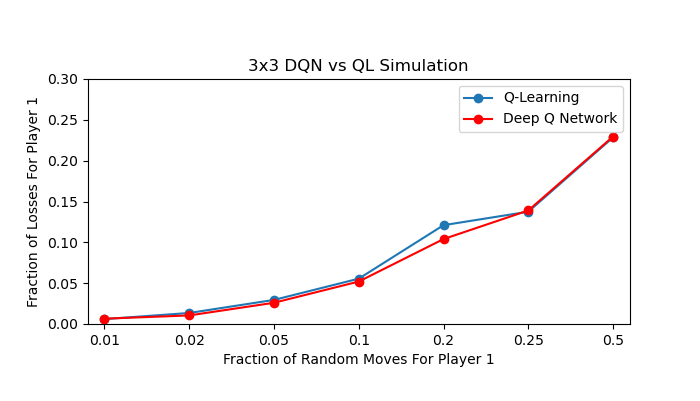

We see that both the Q-Learning and Deep Q-Network agents perform essentially the same against the opponent. We showed in Section 5.1.1 that the Q-Learning agent has learnt near enough the optimal strategy, and so this similarity in performance by the Deep Q-Network provides evidence that it has also learnt an optimal strategy. 

However, the most important difference between these two agents is that the Deep Q-Network is able to learn much faster. While the Q-Learning agent took approximately 30 minutes to train, we were able to train the Deep Q-Network in under 5 minutes. 

Furthermore, due to the network’s ability to interpolate q-value estimates between states, it has effectively explored every board state. In contrast, during the simulation for the Q-Learning agent we encountered a couple occasions where it had not yet explored a board state. In this case, our only option was to force it to make a random move. We believe that this decision is warranted as it penalises the model’s inability to explore all the states.

In Conclusion:

For the 3x3 grid setup, we obtained 2 trained agents which both perform extremely well. With these results, we could explore the applicability of these models to more complicated games. While we could use other models for this setup, we felt it unnecessary to do so as we have solved the 3x3 grid as player 1. This gave us more time to use new models  on the more complicated games such as 4x4 and 5x5.


###  6.2 $4$x$4$ Grid

We now summarise our findings for the Deep Q-Network and Monte Carlo Tree Search algorithms with a 4x4 board. We repeat the simulation for the 3x3 grid but with different models this time. One of the benefits of the Deep Q-Network is that although it is trained as "Player 1", it is still able to make decisions as player 2. For this reason, we compare the models against the trained DQN. We once again introduce randomness for only player 1 to assess the models' ability to perform throughout the state space.

#### 6.2.1 Deep Q-Network

Below we show the results of our simulation.

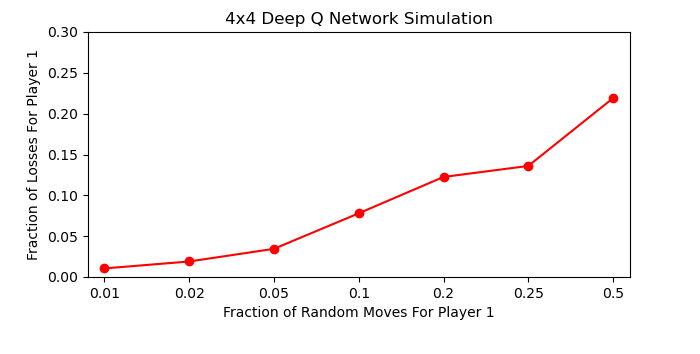

We see that the model is still performing quite well, although now has a slightly higher loss percentage than the 3x3 model when the randomness is low. We see that the loss rates are still drastically lower than the amount of randomness, which shows that the model has learnt a range of strategies and is able to recover a draw from these random moves. We should point out that the loss rate at higher randomness is lower than the 3x3 model but this is expected because a random move is less detrimental with a larger board.This is because it requires the other player to find a longer sequence of moves from here to obtain a win.

#### 6.2.2 Monte Carlo Tree Search

Below we show the results of our simulation.

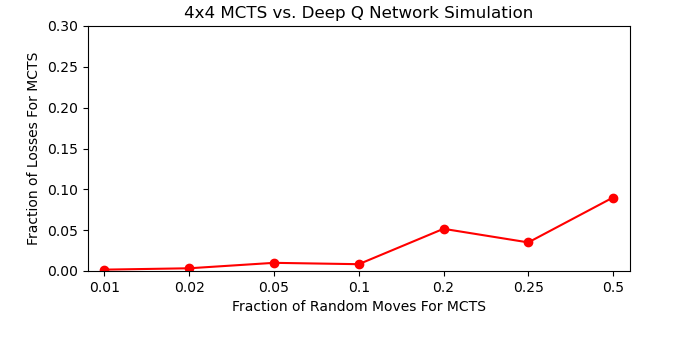

We see that the model the MCTS model performs much better than the Deep Q-Network, even when half of its moves are random. This shows robustness and clearly shows how this method outperformed that of DQN. It is relevant to higlight the computational performance of the MCTS against DQN, the training was much faster and it was trained only 600 episodes in contrast to 5000 episodes for DQN. It is also relevant to comment that once trained, the DQN has a fixed policy and it doesn't change in evaluation, whereas the MCTS its trained and during the evaluation it also performs search in the tree.

### 6.3 $5$x$5$ Grid

#### 6.3.1 Deep Q-Network

Below we present our findings of our simulation as described previously of the $5$x$5$ DQN against itself.

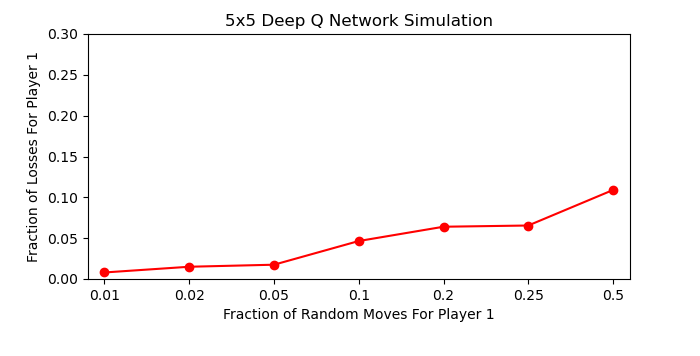

In comparison to our results for the 4x4 DQN, we see a lower loss rate now. This is consistent with our claim earlier that the random moves are less detrminental as there is more time for the player to recover a draw. However, we should note that this lower loss percentage does not necassarily mean that the agent has learnt better - although it may be harder for a human to spot the winning sequence of moves.

### 6.4 Multiple boards: $3$ grids of $3$x$3$

#### 6.4.1 Monte Carlo Tree Search 

Below we present our findings of our simulation as described previously of the $3$ boards $3$x$3$ MCTS against itself.

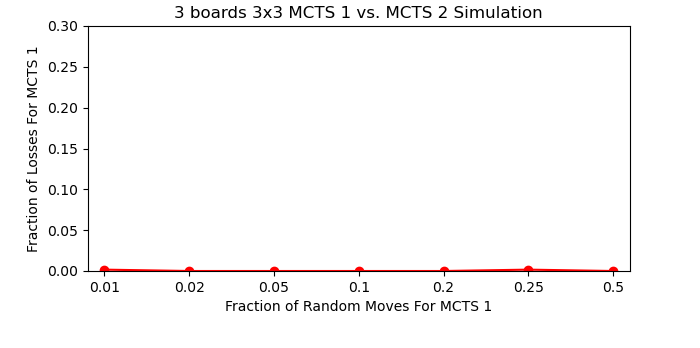

From the plot above, it is interesting to see how good is the MCTS against itself and random actions. This shows robustness of the model, but may also show that MCTS is performing bad enough as player 2. It is reasonable to think about increasing exploration for player 2 and the number of rollouts.

## 7. Conclusion and Future Work

In this work we implemented a variety of models including Q-Learning, Double Q-Learning, Neural Fitted Q-Iteration, Deep Q-Network, Monte Carlo Tree search (with exploring starts) and AlphaGo Zero (with some variants and exploring starts). We firstly tested whether our agents were making intelligent decisions against a random opponent in a $3$x$3$ board, i.e., we wanted to check were performing better than a simple baseline. This gave us some idea on how long they were taking to learn for each algorithm. After having some idea of the computational effort we decided to discard Neural Fitted Q-iteration given that it trains a neural network from scratch at each iteration, and Q-Learning performs very good for a $3$x$3$ board but was discarded for bigger $n$ and Double Q-Learning showed no significant difference compared to the classical update. The main reason it was discarded is because it uses at least double of memory space than classical Q-Learning. Regarding Deep Q-Network we realised that it has some benefits, for example it is able to generalise and handle large space and action spaces. However its training time for a bigger $n$ was long enough to discard it for $n$ bigger than 6. Our best model was that of Monte Carlo Tree Search, it learns very fast compared to the others and outperforms all of the other algorithms in just a short amount of training time. 

Our main metric to check whether the agents were learning was the running average of the reward against a random opponent in a $3$x$3$ board (using independent learning). However, to test the performance of our models against better opponents and larger setups of the games, we made them play against each other. Since most of our policies (after training) are deterministic, we decided to perform a variant of exploring starts during the tests. This consisted of adding random actions to player 1 depending on a probability. This way, we ensure to prove how robusts our models are and confirm whether they can recover from performing bad in the past. For this, we tracked the loss ratio and most of our models didn't increase it significantly even when the random moves where around the half. We found out that DQN beats Q-Learning most of the cases, MCTS beats DQN and MCTS performs way better as player 1 in a multiple board setup.


Some important insights:

- It is important to highlight the efficiency of MCTS its learning is incredibly fast. The drawback is that it is a tabular method and in its regular version without value function approximation may not handle continuous space state or actions.
- DQN approach needs a lot of training when the $n$x$n$ board has a $n$ higher than 6. Even though it does not train the NN from scratch at every iteration by doing stochastic gradient descent it is very slow when the state and action space are very large.
- Q-Learning approach is also tabular and is unable to generalise and handle continuous state and actions space. Its learning is very slow when the $n$x$n$ board has a $n$ higher than 4. The Double Q-Learning didn't show any significant difference compared to the classical Q-Learning.
- Neural Fitted Q-Iteration has a main drawback: it trains a NN from scratch at every iteration, making it very unefficient.
- AlphaGo Zero is a very promising model, however for our setup it takes a very long time to train. It would be interesting to test in bigger setups such as 4 boards of size $8$x$8$ and train it for longer.


Some future work includes reducing the state space by recognising the inherent simmetry of the board and accelerate the learning of the agent by adding further improvements. Also, the AlphaGo Zero algorithm is promising but again, we need better computers to train it in a lower time so it is left to improve and train this algorithm for bigger environments. Finally, implementing and testing a self-play version for MCTS would be beneficial.

Note that we used and adapted code from:
- Tic-Tac-Toe environment https://towardsdatascience.com/reinforcement-learning-implement-tictactoe-189582bea542
- Seminar 8 for Deep Q-Network
- Seminar 10 for AlphaGo Zero and MCTS

## Bibliography

[1] _Albrecht, S.V., Christianos, F. and Schäfer, L., 2023. Multi-agent reinforcement learning: Foundations and modern approaches. Massachusetts Institute of Technology: Cambridge, MA, USA._

[2] _Watkins, C.J. and Dayan, P., 1992. Q-learning. Machine learning, 8, pp.279-292._

[3] _Coulom, R., 2006, May. Efficient selectivity and backup operators in Monte-Carlo tree search. In International conference on computers and games (pp. 72-83). Berlin, Heidelberg: Springer Berlin Heidelberg._

[4] _H. Van Hasselt et al., “Double q-learning.,” in NIPS, vol. 23, 2010, pp. 2613–
2621._

[5] _M. Riedmiller, “Neural fitted q iteration–first experiences with a data effi
cient neural reinforcement learning method,” in Machine Learning: ECM 
2005: 16th European Conference on Machine Learning, Porto, Portuga ,
October 3-7, 2005. Proceedings 16, Springer, 2005, pp. 317–3._

[6] _D. Ernst, P. Geurts, and L. Wehenkel, “Tree-based batch mode reinforce
ment learning,” Journal of Machine Learning Research, vol. 6, 200._

[7] _V. Mnih, K. Kavukcuoglu, D. Silver, et al., “Human-level control through 
deep reinforcement learning,” nature, vol. 518, no. 7540, pp 529–533  201._

[8] _R. S. Sutton, D. McAllester, S. Singh, and Y. Mansour, “Policy gradient methods for reinforcement learning with function approximation,” Advances in neural information processing systems, vol. 12, 19.9._

[9] _H. Van Hasselt, A. Guez, and D. Silver, “Deep reinforcement learning with 
double q-learning,” in Proceedings of the AAAI conference on artificial intelligence, vol. 30, 201._

[10] _R. S. Sutton and A. G. Barto, Reinforcement learning: An introduction 
(MIT press, 20186)._



[11] _W. B. Powell, Reinforcement learning and stochastic optimization, 2021._

[12] _M. C. Fu, “Monte carlo tree search: A tutorial,” in 2018 Winter Simulation Conference (WSC), IEEE, 2018, pp. 222–23._

[13] _D. Silver, A. Huang, C. J. Maddison, et al., “Mastering the game of go with deep neural networks and tree search,” nature, vol. 529, no. 7587 pp. 484–489, 201._

[14] _D. Silver, J. Schrittwieser, K. Simonyan, et al., “Mastering the game of go without human knowledge,” nature, vol. 550, no. 7676, pp. 354–359, 2017._

[15] _Kaelbling, L. P., Littman, M. L., & Moore, A. W. (1996). Reinforcement learning: A survey. Journal of artificial intelligence research, 4, 237-285._

[16] _Busoniu, L., Babuska, R., & De Schutter, B. (2008). A comprehensive survey of multiagent reinforcement learning. IEEE Transactions on Systems, Man, and Cybernetics, Part C (Applications and Reviews), 38(2), 156-172._

[17] _Panait, L., & Luke, S. (2005). Cooperative multi-agent learning: The state of the art. Autonomous agents and multi-agent systems, 11(3), 387-434._

[18] _Littman, M. L. (1994). Markov games as a framework for multi-agent reinforcement learning. In Proceedings of the eleventh international conference on machine learning (pp. 157-163)._

[19] _Stone, P., & Veloso, M. (2000). Multiagent systems: A survey from a machine learning perspective. Autonomous Robots, 8(3), 345-383._

[20] _Lanctot, M., Waugh, J., Zinkevich, M., & Bowling, M. (2008). Monte Carlo sampling for regret minimization in extensive games. In Advances in Neural Information Processing Systems (pp. 659-666)._

[21] _B. Von Stengel, Game theory basics. Cambridge University Press, 2021._